In [2]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.preprocessing import LabelEncoder
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# NN 
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout,Embedding,SimpleRNN, Bidirectional, LSTM, GRU

# preprocessing
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing import sequence

In [3]:
df = pd.read_csv("Review_Data.csv")

In [4]:
df.head()

,Unnamed: 0,review,sentiment
0,0,Not sure who was more lost - the flat characte...,0
1,1,Attempting artiness with black & white and cle...,0
2,2,Very little music or anything to speak of.,0
3,3,The best scene in the movie was when Gerardo i...,1
4,4,"The rest of the movie lacks art, charm, meanin...",0


In [5]:
positive = ' '.join(df[df["sentiment"] == 1]["review"])
negative = ' '.join(df[df["sentiment"] == 0]["review"])

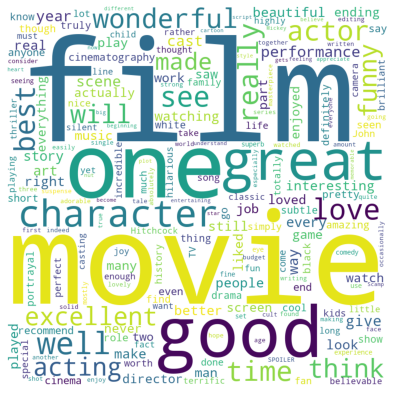

In [6]:
wc = WordCloud(width = 800, height = 800, 
              background_color ='white',  
              min_font_size = 10)

wc.generate(positive)
  
plt.figure(figsize=(7,7)) 
plt.imshow(wc) 
plt.axis("off") 
plt.show()

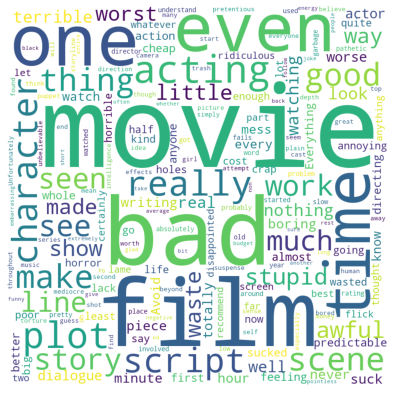

In [7]:
wc = WordCloud(width = 800, height = 800, 
              background_color ='white',  
              min_font_size = 10)

wc.generate(negative)
  
plt.figure(figsize=(7,7)) 
plt.imshow(wc) 
plt.axis("off") 
plt.show()

In [8]:
# Feature and target
X = df["review"]
y = df["sentiment"]
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=1)

In [9]:
# Tokenization
tok = Tokenizer()

tok.fit_on_texts(X_train)

In [10]:
import pickle
myfile = open("mytok.pkl","wb")
pickle.dump(tok,myfile) 
myfile.close()

In [11]:
vocabulary = tok.index_word
print(vocabulary)

{1: 'the', 2: 'and', 3: 'a', 4: 'of', 5: 'is', 6: 'this', 7: 'it', 8: 'i', 9: 'to', 10: 'in', 11: 'was', 12: 'movie', 13: 'film', 14: 'that', 15: 'for', 16: 'with', 17: 'as', 18: 'but', 19: 'are', 20: 'on', 21: 'not', 22: "it's", 23: 'just', 24: 'one', 25: 'you', 26: 'bad', 27: 'an', 28: 'all', 29: 'so', 30: 'about', 31: 'at', 32: 'very', 33: 'there', 34: 'like', 35: 'good', 36: 'by', 37: 'from', 38: 'have', 39: 'time', 40: 'he', 41: 'out', 42: 'even', 43: 'acting', 44: 'has', 45: 'his', 46: 'be', 47: 'were', 48: 'well', 49: 'if', 50: 'great', 51: 'who', 52: 'characters', 53: 'how', 54: 'more', 55: 'my', 56: 'or', 57: 'really', 58: 'see', 59: 'when', 60: 'some', 61: 'than', 62: 'no', 63: 'best', 64: 'plot', 65: 'made', 66: 'story', 67: 'movies', 68: 'character', 69: "didn't", 70: 'most', 71: 'scenes', 72: 'wonderful', 73: 'its', 74: 'better', 75: "don't", 76: '10', 77: 'me', 78: 'ever', 79: 'they', 80: 'what', 81: 'which', 82: 'also', 83: 'can', 84: 'only', 85: 'real', 86: 'work', 87: 

In [12]:
vocab_length = len(vocabulary)
vocab_length

2486

In [14]:
# Sequence
train_seq = tok.texts_to_sequences(X_train)
print(train_seq)

[[7, 912, 60, 913, 529, 16, 914, 2, 530, 2, 4, 531, 44, 915, 532, 102], [6, 5, 3, 377, 12], [18, 7, 5, 378, 916], [1, 533, 31, 917, 47, 918, 2, 66, 5, 29, 132, 7, 919, 534, 379, 30, 81, 535, 920, 3, 921, 922, 1, 923, 9, 244, 380, 381, 8, 23, 69, 297, 30, 107, 4, 6, 13, 2, 382, 21, 9, 245, 924, 213, 3, 925, 536, 9, 926, 537, 927], [1, 12, 44, 188, 62, 246, 71, 10, 7, 2, 32, 115, 214], [1, 928, 71, 19, 133, 929, 189, 34, 383, 930, 134, 247, 931, 932, 31, 384, 14, 19, 76, 933, 934, 4, 1, 935, 385], [936, 77, 3, 538, 18, 8, 91, 6, 5, 24, 4, 1, 63, 67, 78], [8, 116, 21, 937, 9, 42, 117, 7, 15, 32, 215, 15, 539, 4, 938, 8, 939], [22, 29, 26, 22, 147, 135, 216, 23, 15, 14, 540], [6, 12, 5, 82, 541], [6, 12, 5, 29, 386], [542, 940, 11, 387, 388], [22, 136, 543, 14, 6, 72, 13, 11, 65, 10, 941, 17, 544, 298, 108, 73, 942, 943, 10, 1, 944, 945, 217, 2, 299, 529, 31, 14, 39], [10, 248, 8, 148, 7, 74, 61, 946, 16, 3, 947, 2, 8, 148, 6, 948, 949, 950, 74, 61, 951, 389], [8, 300, 952, 1, 162, 39, 8, 

In [15]:
# doc length

doc_length = []
for doc in train_seq:
  doc_length.append(len(doc))

print(doc_length)

[16, 5, 5, 51, 13, 25, 15, 17, 11, 5, 5, 5, 29, 22, 16, 16, 11, 35, 20, 10, 16, 29, 4, 2, 18, 14, 12, 12, 11, 12, 34, 30, 34, 28, 3, 45, 12, 6, 1, 36, 19, 7, 33, 35, 15, 11, 33, 19, 7, 5, 8, 12, 20, 10, 18, 7, 16, 6, 21, 11, 10, 3, 5, 8, 5, 6, 4, 6, 15, 34, 8, 21, 20, 29, 31, 4, 6, 9, 27, 11, 6, 34, 6, 38, 21, 20, 13, 8, 7, 25, 14, 18, 17, 18, 26, 7, 5, 3, 11, 17, 23, 8, 7, 12, 3, 2, 3, 11, 5, 5, 14, 12, 9, 14, 15, 9, 8, 12, 15, 26, 9, 3, 6, 24, 12, 10, 10, 10, 34, 28, 19, 10, 11, 24, 21, 27, 24, 4, 17, 10, 19, 20, 27, 16, 12, 33, 9, 12, 10, 6, 6, 2, 5, 4, 3, 15, 5, 16, 2, 7, 9, 18, 25, 25, 12, 12, 24, 33, 5, 13, 5, 4, 17, 23, 13, 7, 15, 21, 25, 8, 18, 11, 17, 12, 43, 25, 35, 5, 12, 12, 9, 24, 28, 5, 7, 10, 6, 6, 11, 6, 5, 6, 4, 5, 21, 7, 19, 20, 6, 3, 2, 16, 16, 18, 2, 12, 8, 4, 8, 19, 8, 25, 31, 14, 7, 2, 20, 14, 7, 57, 25, 19, 14, 2, 12, 27, 12, 33, 24, 14, 18, 5, 16, 10, 13, 5, 5, 3, 22, 9, 16, 28, 17, 11, 4, 9, 10, 9, 20, 13, 10, 7, 31, 11, 24, 7, 24, 16, 19, 21, 12, 3, 7, 36, 8, 

In [16]:
max(doc_length)

69

In [17]:
np.quantile(doc_length,0.99)

45.0

In [18]:
np.quantile(doc_length,0.95)

33.0

In [19]:
max_length = 45

In [20]:
# Padding
train_matrix = sequence.pad_sequences(train_seq,maxlen=max_length)
train_matrix

array([[  0,   0,   0, ..., 915, 532, 102],
       [  0,   0,   0, ...,   3, 377,  12],
       [  0,   0,   0, ...,   5, 378, 916],
       ...,
       [  0,   0,   0, ...,   3,  85,  12],
       [  0,   0,   0, ...,  20,   2,  20],
       [  0,   0,   0, ...,  22, 454, 840]])

In [21]:
# Preprocessing test Data
# Sequence

test_seq = tok.texts_to_sequences(X_test)

# Padding

test_matrix = sequence.pad_sequences(test_seq,maxlen = max_length)
test_matrix

array([[  0,   0,   0, ...,   3, 388, 111],
       [  0,   0,   0, ...,   9, 101,  77],
       [  0,   0,   0, ...,  42,  35,  15],
       ...,
       [  0,   0,   0, ...,   3,  35, 222],
       [  0,   0,   0, ...,  22,  23, 551],
       [  0,   0,   0, ...,  12,   5, 128]])

In [23]:
# Neural Network

model = Sequential()
model.add( Embedding( input_dim = vocab_length + 1, output_dim = 100, input_length = max_length, mask_zero = True))

model.add(SimpleRNN(64))
model.add(Dense(32,activation = "relu"))
model.add(Dense(16,activation = "relu"))
model.add(Dense(1,activation = "sigmoid"))

In [25]:
model.compile(optimizer = "adam", loss = "binary_crossentropy")
model.fit(train_matrix, y_train, epochs=20, batch_size=32)


Epoch 1/20
22/22 [==============================] - 4s 11ms/step - loss: 0.6906
Epoch 2/20
22/22 [==============================] - 0s 13ms/step - loss: 0.5718
Epoch 3/20
22/22 [==============================] - 0s 11ms/step - loss: 0.2806
Epoch 4/20
22/22 [==============================] - 0s 11ms/step - loss: 0.0750
Epoch 5/20
22/22 [==============================] - 0s 11ms/step - loss: 0.0260
Epoch 6/20
22/22 [==============================] - 0s 11ms/step - loss: 0.0116
Epoch 7/20
22/22 [==============================] - 0s 11ms/step - loss: 0.0060
Epoch 8/20
22/22 [==============================] - 0s 11ms/step - loss: 0.0037
Epoch 9/20
22/22 [==============================] - 0s 11ms/step - loss: 0.0027
Epoch 10/20
22/22 [==============================] - 0s 11ms/step - loss: 0.0020
Epoch 11/20
22/22 [==============================] - 0s 11ms/step - loss: 0.0016
Epoch 12/20
22/22 [==============================] - 0s 11ms/step - loss: 0.0013
Epoch 13/20
22/22 [==================

In [27]:
# prediction
y_pred = model.predict(test_matrix)
y_pred = np.where(y_pred >= 0.5, 1, 0)
print(classification_report(y_test,y_pred))

10/10 [==============================] - 0s 3ms/step
              precision    recall  f1-score   support

           0       0.55      0.65      0.59       151
           1       0.56      0.46      0.50       149

    accuracy                           0.55       300
   macro avg       0.55      0.55      0.55       300
weighted avg       0.55      0.55      0.55       300



### Bi-Directional RNN

In [28]:
# Bi-RNN Neural Network

model1 = Sequential()
model1.add(Embedding(input_dim=vocab_length+1, 
                    output_dim=100,
                    input_length=max_length,
                    mask_zero=True))
model1.add(Bidirectional(SimpleRNN(32)))
model1.add(Dense(16,activation="relu"))
model1.add(Dropout(0.2))
model1.add(Dense(1,activation="sigmoid"))

In [29]:
model1.compile(optimizer="adam",loss="binary_crossentropy")
model1.fit(train_matrix,y_train,epochs=20,batch_size=32)

Epoch 1/20
22/22 [==============================] - 3s 29ms/step - loss: 0.6901
Epoch 2/20
22/22 [==============================] - 1s 25ms/step - loss: 0.5445
Epoch 3/20
22/22 [==============================] - 1s 23ms/step - loss: 0.2954
Epoch 4/20
22/22 [==============================] - 0s 21ms/step - loss: 0.0990
Epoch 5/20
22/22 [==============================] - 0s 21ms/step - loss: 0.0412
Epoch 6/20
22/22 [==============================] - 0s 21ms/step - loss: 0.0207
Epoch 7/20
22/22 [==============================] - 0s 21ms/step - loss: 0.0129
Epoch 8/20
22/22 [==============================] - 0s 22ms/step - loss: 0.0089
Epoch 9/20
22/22 [==============================] - 0s 21ms/step - loss: 0.0070
Epoch 10/20
22/22 [==============================] - 0s 21ms/step - loss: 0.0055
Epoch 11/20
22/22 [==============================] - 0s 21ms/step - loss: 0.0051
Epoch 12/20
22/22 [==============================] - 0s 21ms/step - loss: 0.0031
Epoch 13/20
22/22 [==================

In [30]:
# prediction
y_pred = model1.predict(test_matrix)
y_pred = np.where(y_pred >= 0.5, 1, 0)
print(classification_report(y_test,y_pred))

10/10 [==============================] - 0s 4ms/step
              precision    recall  f1-score   support

           0       0.67      0.66      0.67       151
           1       0.66      0.67      0.67       149

    accuracy                           0.67       300
   macro avg       0.67      0.67      0.67       300
weighted avg       0.67      0.67      0.67       300



### Multi-layer RNN

In [31]:
# Multi-layer RNN

model2 = Sequential()
model2.add(Embedding(input_dim=vocab_length+1, 
                    output_dim=100,
                    input_length=max_length,
                    mask_zero=True))
model2.add(SimpleRNN(64, return_sequences=True))
model2.add(SimpleRNN(64))
model2.add(Dense(32,activation="relu"))
model2.add(Dropout(0.2))
model2.add(Dense(1,activation="sigmoid"))

In [32]:
model2.compile(optimizer="adam",loss="binary_crossentropy")
model2.fit(train_matrix,y_train,epochs=20,batch_size=16)

Epoch 1/20
44/44 [==============================] - 3s 19ms/step - loss: 0.7116
Epoch 2/20
44/44 [==============================] - 1s 20ms/step - loss: 0.4253
Epoch 3/20
44/44 [==============================] - 1s 18ms/step - loss: 0.1298
Epoch 4/20
44/44 [==============================] - 1s 19ms/step - loss: 0.0457
Epoch 5/20
44/44 [==============================] - 1s 18ms/step - loss: 0.0221
Epoch 6/20
44/44 [==============================] - 1s 20ms/step - loss: 0.0084
Epoch 7/20
44/44 [==============================] - 1s 20ms/step - loss: 0.0039
Epoch 8/20
44/44 [==============================] - 1s 20ms/step - loss: 0.0029
Epoch 9/20
44/44 [==============================] - 1s 20ms/step - loss: 0.0020
Epoch 10/20
44/44 [==============================] - 1s 19ms/step - loss: 0.0013
Epoch 11/20
44/44 [==============================] - 1s 18ms/step - loss: 0.0011
Epoch 12/20
44/44 [==============================] - 1s 19ms/step - loss: 0.0012
Epoch 13/20
44/44 [==================

In [33]:
# prediction
y_pred = model2.predict(test_matrix)
y_pred = np.where(y_pred >= 0.5, 1, 0)
print(classification_report(y_test,y_pred))

10/10 [==============================] - 0s 7ms/step
              precision    recall  f1-score   support

           0       0.59      0.57      0.58       151
           1       0.58      0.60      0.59       149

    accuracy                           0.58       300
   macro avg       0.58      0.58      0.58       300
weighted avg       0.58      0.58      0.58       300



### LSTM

In [34]:
model3 = Sequential()
model3.add(Embedding(input_dim=vocab_length+1, 
                    output_dim=100,
                    input_length=max_length,
                    mask_zero=True))
model3.add(LSTM(32))
model3.add(Dense(16,activation="relu"))
model3.add(Dropout(0.2))
model3.add(Dense(1,activation="sigmoid"))

In [35]:
model3.compile(optimizer="adam",loss="binary_crossentropy")
model3.fit(train_matrix,y_train,epochs=15,batch_size=16)

Epoch 1/15
44/44 [==============================] - 4s 18ms/step - loss: 0.6907
Epoch 2/15
44/44 [==============================] - 1s 18ms/step - loss: 0.6102
Epoch 3/15
44/44 [==============================] - 1s 18ms/step - loss: 0.2933
Epoch 4/15
44/44 [==============================] - 1s 18ms/step - loss: 0.1065
Epoch 5/15
44/44 [==============================] - 1s 18ms/step - loss: 0.0651
Epoch 6/15
44/44 [==============================] - 1s 19ms/step - loss: 0.0319
Epoch 7/15
44/44 [==============================] - 1s 18ms/step - loss: 0.0188
Epoch 8/15
44/44 [==============================] - 1s 18ms/step - loss: 0.0106
Epoch 9/15
44/44 [==============================] - 1s 18ms/step - loss: 0.0068
Epoch 10/15
44/44 [==============================] - 1s 19ms/step - loss: 0.0068
Epoch 11/15
44/44 [==============================] - 1s 18ms/step - loss: 0.0051
Epoch 12/15
44/44 [==============================] - 1s 20ms/step - loss: 0.0041
Epoch 13/15
44/44 [==================

In [36]:
# prediction
y_pred = model3.predict(test_matrix)
y_pred = np.where(y_pred >= 0.5, 1, 0)
print(classification_report(y_test,y_pred))

10/10 [==============================] - 2s 4ms/step
              precision    recall  f1-score   support

           0       0.76      0.75      0.76       151
           1       0.75      0.77      0.76       149

    accuracy                           0.76       300
   macro avg       0.76      0.76      0.76       300
weighted avg       0.76      0.76      0.76       300



In [37]:
# save model
model3.save("mymodel.h5")

In [38]:
# Bidirectional and multilayer

model4 = Sequential()
model4.add(Embedding(input_dim=vocab_length+1, 
                    output_dim=100,
                    input_length=max_length,
                    mask_zero=True))
model4.add(Bidirectional(LSTM(32, return_sequences=True)))
model4.add(Bidirectional(LSTM(32)))
model4.add(Dense(16,activation="relu"))
model4.add(Dropout(0.2))
model4.add(Dense(1,activation="sigmoid"))

In [39]:
model4.compile(optimizer="adam",loss="binary_crossentropy")
model4.fit(train_matrix,y_train,epochs=15,batch_size=16)

Epoch 1/15
44/44 [==============================] - 16s 40ms/step - loss: 0.6909
Epoch 2/15
44/44 [==============================] - 2s 45ms/step - loss: 0.4649
Epoch 3/15
44/44 [==============================] - 2s 49ms/step - loss: 0.1422
Epoch 4/15
44/44 [==============================] - 2s 43ms/step - loss: 0.0545
Epoch 5/15
44/44 [==============================] - 2s 43ms/step - loss: 0.0311
Epoch 6/15
44/44 [==============================] - 2s 47ms/step - loss: 0.0344
Epoch 7/15
44/44 [==============================] - 3s 58ms/step - loss: 0.0531
Epoch 8/15
44/44 [==============================] - 2s 41ms/step - loss: 0.0332
Epoch 9/15
44/44 [==============================] - 2s 39ms/step - loss: 0.0137
Epoch 10/15
44/44 [==============================] - 2s 40ms/step - loss: 0.0076
Epoch 11/15
44/44 [==============================] - 2s 52ms/step - loss: 0.0032
Epoch 12/15
44/44 [==============================] - 3s 57ms/step - loss: 0.0031
Epoch 13/15
44/44 [=================

In [40]:
# prediction
y_pred = model4.predict(test_matrix)
y_pred = np.where(y_pred >= 0.5, 1, 0)
print(classification_report(y_test,y_pred))

10/10 [==============================] - 6s 13ms/step
              precision    recall  f1-score   support

           0       0.76      0.78      0.77       151
           1       0.77      0.74      0.76       149

    accuracy                           0.76       300
   macro avg       0.76      0.76      0.76       300
weighted avg       0.76      0.76      0.76       300



### GRU

In [41]:
model5 = Sequential()
model5.add(Embedding(input_dim=vocab_length+1, 
                    output_dim=100,
                    input_length=max_length,
                    mask_zero=True))
model5.add(GRU(32))
model5.add(Dense(16,activation="relu"))
model5.add(Dropout(0.2))
model5.add(Dense(1,activation="sigmoid"))

In [42]:
model5.compile(optimizer="adam",loss="binary_crossentropy")
model5.fit(train_matrix,y_train,epochs=15,batch_size=16)

Epoch 1/15
44/44 [==============================] - 4s 18ms/step - loss: 0.6905
Epoch 2/15
44/44 [==============================] - 1s 17ms/step - loss: 0.6293
Epoch 3/15
44/44 [==============================] - 1s 17ms/step - loss: 0.2831
Epoch 4/15
44/44 [==============================] - 1s 17ms/step - loss: 0.1042
Epoch 5/15
44/44 [==============================] - 1s 17ms/step - loss: 0.0376
Epoch 6/15
44/44 [==============================] - 1s 17ms/step - loss: 0.0198
Epoch 7/15
44/44 [==============================] - 1s 18ms/step - loss: 0.0158
Epoch 8/15
44/44 [==============================] - 1s 17ms/step - loss: 0.0086
Epoch 9/15
44/44 [==============================] - 1s 19ms/step - loss: 0.0072
Epoch 10/15
44/44 [==============================] - 1s 19ms/step - loss: 0.0046
Epoch 11/15
44/44 [==============================] - 1s 19ms/step - loss: 0.0026
Epoch 12/15
44/44 [==============================] - 1s 21ms/step - loss: 0.0025
Epoch 13/15
44/44 [==================

In [43]:
# prediction
y_pred = model5.predict(test_matrix)
y_pred = np.where(y_pred >= 0.5, 1, 0)
print(classification_report(y_test,y_pred))

10/10 [==============================] - 2s 7ms/step
              precision    recall  f1-score   support

           0       0.77      0.75      0.76       151
           1       0.75      0.77      0.76       149

    accuracy                           0.76       300
   macro avg       0.76      0.76      0.76       300
weighted avg       0.76      0.76      0.76       300

